# Objective - To model the price of houses with the available independent variables & find out variable impacting proces significantly.


# Approach - Since the target variable " SalePrice" is numerical and continous in nature hence a regression modelling approach will be suitable

## *Import required dependencies using pyforest*

## Loading Datasets

In [1]:
import warnings
warnings.filterwarnings('ignore')
df_tr = pd.read_csv('train.csv') # Loading training data
df_te = pd.read_csv('test.csv') # Loading test data

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Performing EDA

In [2]:
df_tr.head() # Checking training dataset top five rows

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  127         120       RL          NaN     4928   Pave   NaN      IR1   
1  889          20       RL         95.0    15865   Pave   NaN      IR1   
2  793          60       RL         92.0     9920   Pave   NaN      IR1   
3  110          20       RL        105.0    11751   Pave   NaN      IR1   
4  422          20       RL          NaN    16635   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
4         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2007        WD         Normal     128000  
1     10   2007        WD         Normal     268000  
2      6   2007        WD         Normal     269790  
3      1   2010       COD         Normal     190000  
4      6   2009        WD         Normal     215000  

[5 rows x 81 columns]

In [3]:
df_te.head() # Checking test dataset top five rows

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   337          20       RL         86.0    14157   Pave   NaN      IR1   
1  1018         120       RL          NaN     5814   Pave   NaN      IR1   
2   929          20       RL          NaN    11838   Pave   NaN      Reg   
3  1148          70       RL         75.0    12000   Pave   NaN      Reg   
4  1227          60       RL         86.0    14598   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC Fence MiscFeature  \
0         HLS    AllPub  ...           0        0    NaN   NaN         NaN   
1         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
2         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
3         Bnk    AllPub  ...           0        0    NaN   NaN         NaN   
4         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      7    2007        WD         Normal  
1       0      8    2009       COD        Abnorml  
2       0      6    2009        WD         Normal  
3       0      7    2009        WD         Normal  
4       0      1    2008        WD         Normal  

[5 rows x 80 columns]

In [4]:
print(df_tr.shape); print(df_te.shape) # Checking data shape

(1168, 81)
(292, 80)


<IPython.core.display.Javascript object>

AxesSubplot(0.125,0.125;0.62x0.755)


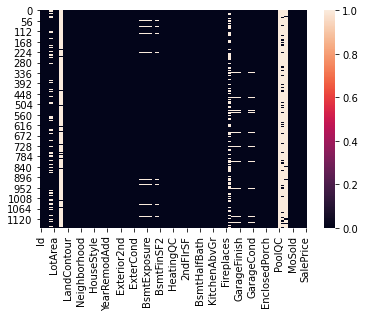

In [5]:
print(sns.heatmap(df_tr.isnull())) # Presence of null values in training set

<IPython.core.display.Javascript object>

AxesSubplot(0.125,0.125;0.62x0.755)


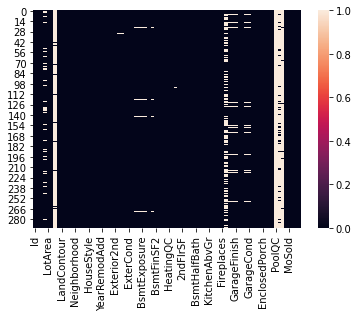

In [6]:
print(sns.heatmap(df_te.isnull())) # Presence of null values in test set

In [7]:
print(df_tr.columns);print(df_te.columns) # Print column names in training and test datasets

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [8]:
(df_tr.drop(['SalePrice'],axis=1)).columns==df_te.columns # Comparing train and test datasets except 'SalePrice'

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

In [9]:
print(df_tr.info());print(df_te.info()) # Checking null values and Data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [10]:
# grouping based on data type in training set
type_dct_tr = {str(k): list(v) for k, v in df_tr.groupby(df_tr.dtypes, axis=1)}
type_dct_tr

{'int64': ['Id',
  'MSSubClass',
  'LotArea',
  'OverallQual',
  'OverallCond',
  'YearBuilt',
  'YearRemodAdd',
  'BsmtFinSF1',
  'BsmtFinSF2',
  'BsmtUnfSF',
  'TotalBsmtSF',
  '1stFlrSF',
  '2ndFlrSF',
  'LowQualFinSF',
  'GrLivArea',
  'BsmtFullBath',
  'BsmtHalfBath',
  'FullBath',
  'HalfBath',
  'BedroomAbvGr',
  'KitchenAbvGr',
  'TotRmsAbvGrd',
  'Fireplaces',
  'GarageCars',
  'GarageArea',
  'WoodDeckSF',
  'OpenPorchSF',
  'EnclosedPorch',
  '3SsnPorch',
  'ScreenPorch',
  'PoolArea',
  'MiscVal',
  'MoSold',
  'YrSold',
  'SalePrice'],
 'float64': ['LotFrontage', 'MasVnrArea', 'GarageYrBlt'],
 'object': ['MSZoning',
  'Street',
  'Alley',
  'LotShape',
  'LandContour',
  'Utilities',
  'LotConfig',
  'LandSlope',
  'Neighborhood',
  'Condition1',
  'Condition2',
  'BldgType',
  'HouseStyle',
  'RoofStyle',
  'RoofMatl',
  'Exterior1st',
  'Exterior2nd',
  'MasVnrType',
  'ExterQual',
  'ExterCond',
  'Foundation',
  'BsmtQual',
  'BsmtCond',
  'BsmtExposure',
  'BsmtFinTyp

In [11]:
# grouping based on data type in test set
type_dct_te = {str(k): list(v) for k, v in df_te.groupby(df_te.dtypes, axis=1)}
type_dct_te

{'int64': ['Id',
  'MSSubClass',
  'LotArea',
  'OverallQual',
  'OverallCond',
  'YearBuilt',
  'YearRemodAdd',
  'BsmtFinSF1',
  'BsmtFinSF2',
  'BsmtUnfSF',
  'TotalBsmtSF',
  '1stFlrSF',
  '2ndFlrSF',
  'LowQualFinSF',
  'GrLivArea',
  'BsmtFullBath',
  'BsmtHalfBath',
  'FullBath',
  'HalfBath',
  'BedroomAbvGr',
  'KitchenAbvGr',
  'TotRmsAbvGrd',
  'Fireplaces',
  'GarageCars',
  'GarageArea',
  'WoodDeckSF',
  'OpenPorchSF',
  'EnclosedPorch',
  '3SsnPorch',
  'ScreenPorch',
  'PoolArea',
  'MiscVal',
  'MoSold',
  'YrSold'],
 'float64': ['LotFrontage', 'MasVnrArea', 'GarageYrBlt', 'PoolQC'],
 'object': ['MSZoning',
  'Street',
  'Alley',
  'LotShape',
  'LandContour',
  'Utilities',
  'LotConfig',
  'LandSlope',
  'Neighborhood',
  'Condition1',
  'Condition2',
  'BldgType',
  'HouseStyle',
  'RoofStyle',
  'RoofMatl',
  'Exterior1st',
  'Exterior2nd',
  'MasVnrType',
  'ExterQual',
  'ExterCond',
  'Foundation',
  'BsmtQual',
  'BsmtCond',
  'BsmtExposure',
  'BsmtFinType1',


In [12]:
df_tr.describe() # Checcking statistical pattern

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1168.000000  1168.000000    954.00000    1168.000000  1168.000000   
mean    724.136130    56.767979     70.98847   10484.749144     6.104452   
std     416.159877    41.940650     24.82875    8957.442311     1.390153   
min       1.000000    20.000000     21.00000    1300.000000     1.000000   
25%     360.500000    20.000000     60.00000    7621.500000     5.000000   
50%     714.500000    50.000000     70.00000    9522.500000     6.000000   
75%    1079.500000    70.000000     80.00000   11515.500000     7.000000   
max    1460.000000   190.000000    313.00000  164660.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1168.000000  1168.000000   1168.000000  1161.000000  1168.000000  ...   
mean      5.595890  1970.930651   1984.758562   102.310078   444.726027  ...   
std       1.124343    30.145255     20.785185   182.595606   462.664785  ...   
min       1.000000  1875.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1966.000000     0.000000     0.000000  ...   
50%       5.000000  1972.000000   1993.000000     0.000000   385.500000  ...   
75%       6.000000  2000.000000   2004.000000   160.000000   714.500000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1168.000000  1168.000000    1168.000000  1168.000000  1168.000000   
mean     96.206336    46.559932      23.015411     3.639555    15.051370   
std     126.158988    66.381023      63.191089    29.088867    55.080816   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    24.000000       0.000000     0.000000     0.000000   
75%     171.000000    70.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1168.000000   1168.000000  1168.000000  1168.000000    1168.000000  
mean      3.448630     47.315068     6.344178  2007.804795  181477.005993  
std      44.896939    543.264432     2.686352     1.329738   79105.586863  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  130375.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163995.000000  
75%       0.000000      0.000000     8.000000  2009.000000  215000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

1. Most features are seen with significant difference between 75%quartile & max values indicating outliers (to be verified)
2. Mean is greater than median in most features indicating right tailed data.
3. Require further analysis of individually for all features

In [13]:
# Function to analyse features individually
def feature_ana(df = None, x = None):
    series = df[x]
    print(f"New Feature\n\n{series.name}")
    print(f'Stats summary \n{series.describe()}')
    print('+' *80)
    print(f'Series value count is \n{series.value_counts()}')
    print('+' *80)
    print(f'Unique values \n{series.unique()}')
    print('+' *80)
    
for i in df_tr.columns:
    feature_ana(df_tr,i)

New Feature

Id
Stats summary 
count    1168.000000
mean      724.136130
std       416.159877
min         1.000000
25%       360.500000
50%       714.500000
75%      1079.500000
max      1460.000000
Name: Id, dtype: float64
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Series value count is 
1       1
946     1
964     1
963     1
962     1
       ..
480     1
479     1
478     1
477     1
1460    1
Name: Id, Length: 1168, dtype: int64
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Unique values 
[127 889 793 ... 196  31 617]
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
New Feature

MSSubClass
Stats summary 
count    1168.000000
mean       56.767979
std        41.940650
min        20.000000
25%        20.000000
50%        50.000000
75%        70.000000
max       190.000000
Name: MSSubClass, dtype: float64
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

Series value count is 
TA    1022
Gd     117
Fa      26
Ex       2
Po       1
Name: ExterCond, dtype: int64
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Unique values 
['TA' 'Gd' 'Fa' 'Po' 'Ex']
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
New Feature

Foundation
Stats summary 
count       1168
unique         6
top       CBlock
freq         516
Name: Foundation, dtype: object
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Series value count is 
CBlock    516
PConc     513
BrkTil    112
Slab       21
Stone       5
Wood        1
Name: Foundation, dtype: int64
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Unique values 
['CBlock' 'PConc' 'BrkTil' 'Slab' 'Stone' 'Wood']
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
New Feature

BsmtQual
Stats summary 
count     1138
unique       4
top         TA
freq       517
Name: 

Stats summary 
count       1104
unique         6
top       Attchd
freq         691
Name: GarageType, dtype: object
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Series value count is 
Attchd     691
Detchd     314
BuiltIn     70
Basment     16
CarPort      8
2Types       5
Name: GarageType, dtype: int64
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Unique values 
['Attchd' 'BuiltIn' 'Detchd' 'Basment' nan '2Types' 'CarPort']
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
New Feature

GarageYrBlt
Stats summary 
count    1104.000000
mean     1978.193841
std        24.890704
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Series value count is 
2006.0    52
2005.0    51
2007.0    40
2003.0    37
2004.0    36
         

Neighbourhood feature is seen with a human error i.e spelling of NAmes is not as per description but shall not impact model performance

In [14]:
for i in df_te.columns:
    feature_ana(df_te,i)

New Feature

Id
Stats summary 
count     292.000000
mean      755.955479
std       442.565228
min         6.000000
25%       377.750000
50%       778.000000
75%      1152.250000
max      1456.000000
Name: Id, dtype: float64
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Series value count is 
512     1
1352    1
1380    1
867     1
1378    1
       ..
678     1
1174    1
676     1
162     1
1018    1
Name: Id, Length: 292, dtype: int64
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Unique values 
[ 337 1018  929 1148 1227  650 1453  152  427  776   30 1425  423 1185
  775  391 1408  513 1266  173 1150  797  137  706 1377 1177 1456  369
 1421  999 1217  937  769  831  678  574  921 1292 1277  676  108  424
  823 1455  377 1256 1120  265 1158  725 1378 1139  122  515  518 1214
  443  903   53  469   76 1142 1222  851  334 1008   19  339 1118  834
 1176  945 1415  911  388  747  620  386  818  539  535 1399  571   38
  85

Series value count is 
GLQ    88
Unf    85
ALQ    46
BLQ    27
Rec    24
LwQ    15
Name: BsmtFinType1, dtype: int64
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Unique values 
['GLQ' 'Unf' 'Rec' 'BLQ' 'ALQ' nan 'LwQ']
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
New Feature

BsmtFinSF1
Stats summary 
count     292.000000
mean      439.294521
std       429.559675
min         0.000000
25%         0.000000
50%       369.500000
75%       700.500000
max      1767.000000
Name: BsmtFinSF1, dtype: float64
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Series value count is 
0       92
247      2
231      2
565      2
648      2
        ..
193      1
1218     1
196      1
712      1
812      1
Name: BsmtFinSF1, Length: 184, dtype: int64
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Unique values 
[1249 1036    0  275  131  547 1400 1518  866  457 1159  241

Stats summary 
count     275
unique      5
top        TA
freq      261
Name: GarageQual, dtype: object
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Series value count is 
TA    261
Fa      9
Gd      3
Ex      1
Po      1
Name: GarageQual, dtype: int64
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Unique values 
['TA' nan 'Fa' 'Gd' 'Po' 'Ex']
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
New Feature

GarageCond
Stats summary 
count     275
unique      5
top        TA
freq      265
Name: GarageCond, dtype: object
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Series value count is 
TA    265
Fa      7
Ex      1
Gd      1
Po      1
Name: GarageCond, dtype: int64
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Unique values 
['TA' nan 'Fa' 'Po' 'Ex' 'Gd']
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [15]:
df_tr.skew().sort_values() 

GarageYrBlt      -0.644564
YearBuilt        -0.579204
YearRemodAdd     -0.495864
GarageCars       -0.358556
Id                0.026526
FullBath          0.057809
YrSold            0.115765
OverallQual       0.175082
GarageArea        0.189665
MoSold            0.220979
BedroomAbvGr      0.243855
OverallCond       0.580714
BsmtFullBath      0.627106
TotRmsAbvGrd      0.644657
HalfBath          0.656492
Fireplaces        0.671966
2ndFlrSF          0.823479
BsmtUnfSF         0.909057
MSSubClass        1.422019
GrLivArea         1.449952
WoodDeckSF        1.504929
1stFlrSF          1.513707
TotalBsmtSF       1.744591
BsmtFinSF1        1.871606
SalePrice         1.953878
OpenPorchSF       2.410840
LotFrontage       2.450241
MasVnrArea        2.826173
EnclosedPorch     3.043610
ScreenPorch       4.105741
BsmtHalfBath      4.264403
KitchenAbvGr      4.365259
BsmtFinSF2        4.365829
LowQualFinSF      8.666142
3SsnPorch         9.770611
LotArea          10.659285
PoolArea         13.243711
M

from scipy import stats
from statsmodels.stats import weightstats as stests
ztest ,pval1 = stests.ztest(df_tr['MSZoning'], x2=df_tr['SalePrice'], value=0,alternative='two-sided')
print(float(pval1))
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

## Visualization

### Univariate

<AxesSubplot:>

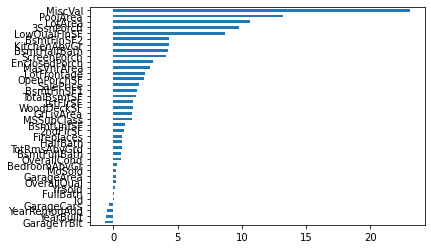

In [16]:
(df_tr.skew()).sort_values().plot(kind= 'barh') # Checking skewness greater than +/-0.5 in training set

<AxesSubplot:>

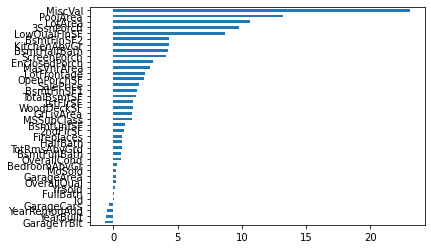

In [17]:
(df_tr.skew()).sort_values().plot(kind = 'barh') # Checking skewness greater than +/-0.5 in test set

Pattern of skewness is seen to be same in both training & Test set

<IPython.core.display.Javascript object>

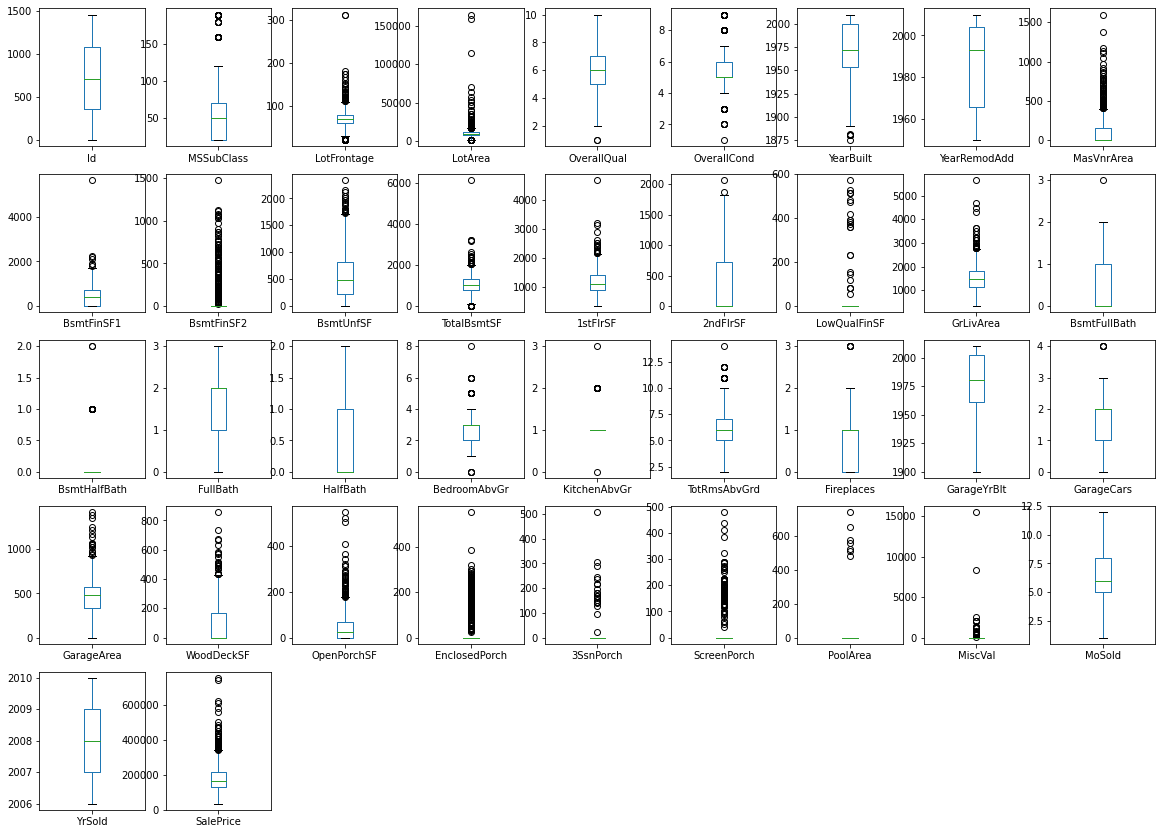

In [18]:
# Checking outliers in training set
df_tr.plot(kind = 'box', subplots=True, layout=(10,9), figsize=(20,30))
plt.show()

<IPython.core.display.Javascript object>

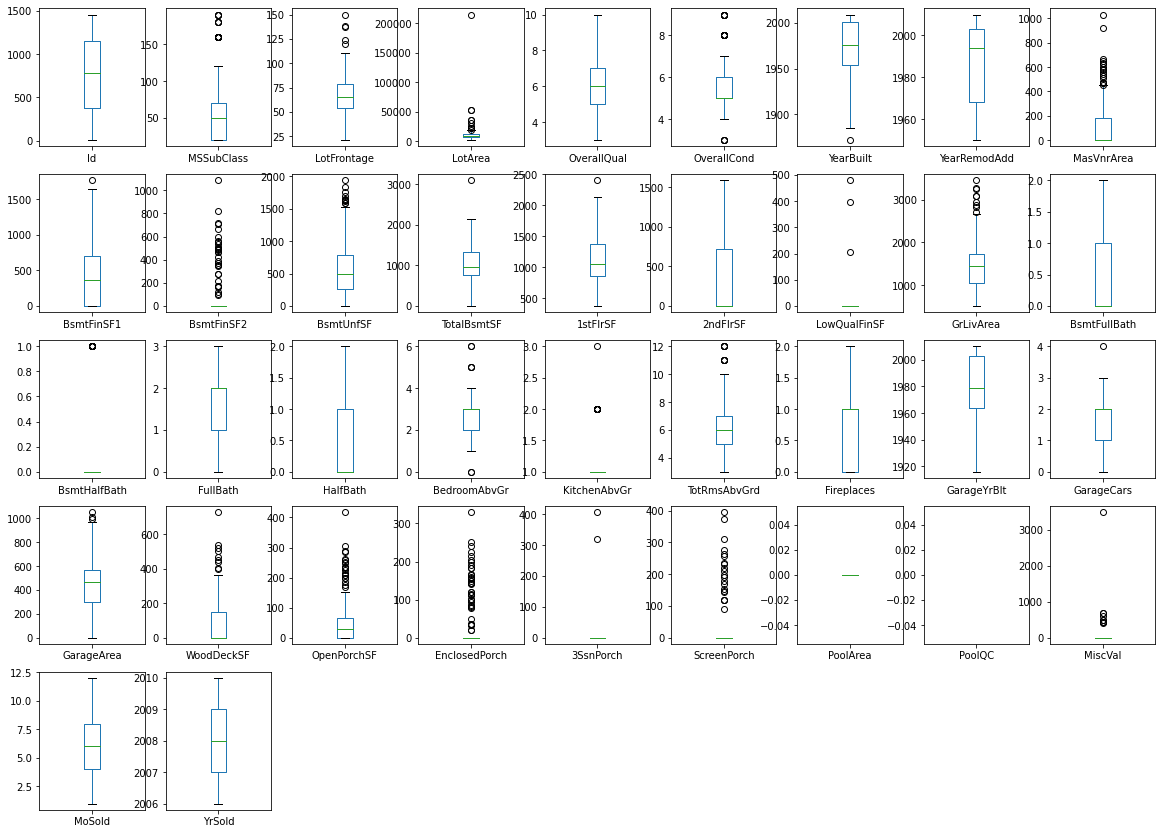

In [19]:
# Checking outliers in test set
df_te.plot(kind = 'box', subplots=True, layout=(10,9), figsize=(20,30))
plt.show()

Outliers can be seen in both datasets, in most of the numerical features

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

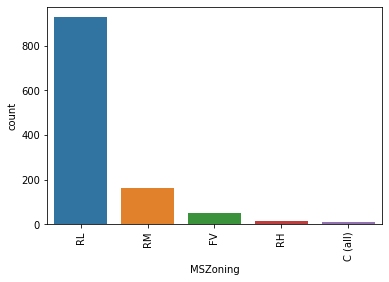

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

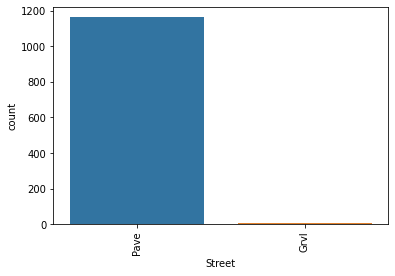

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

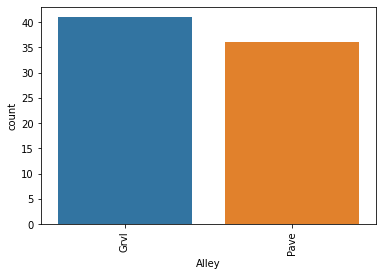

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

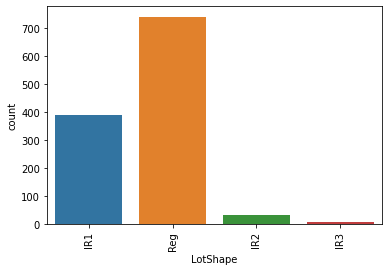

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

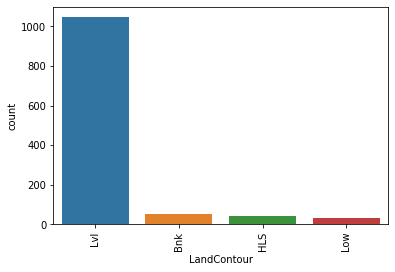

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

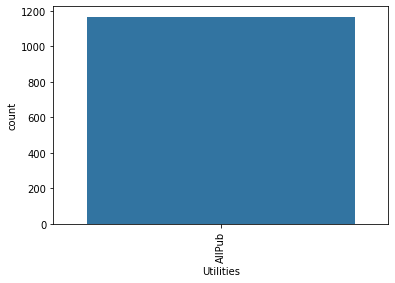

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

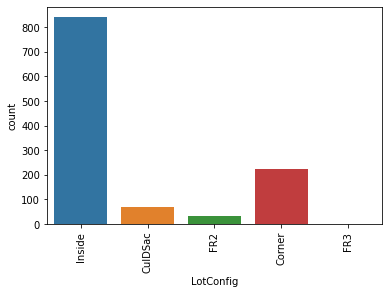

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

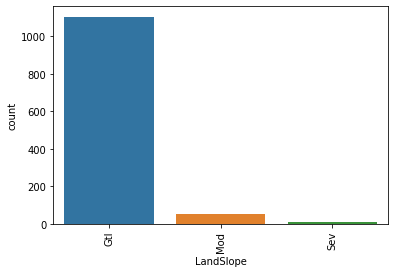

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

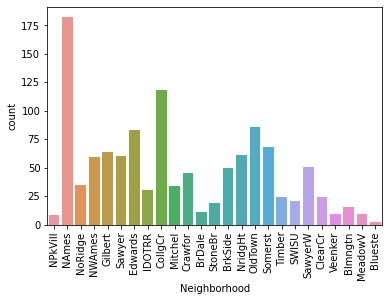

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

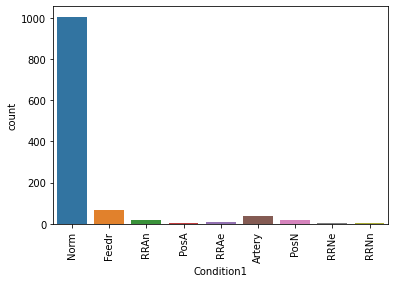

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

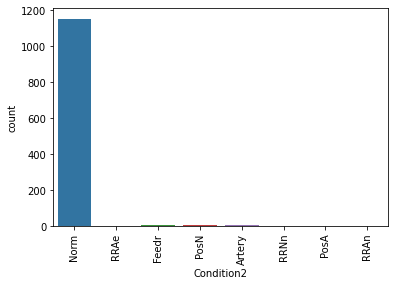

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

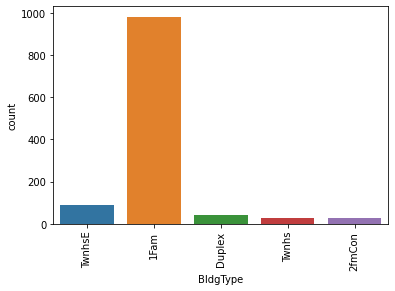

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

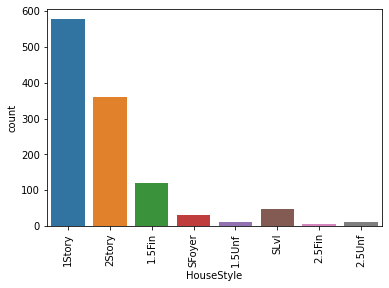

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

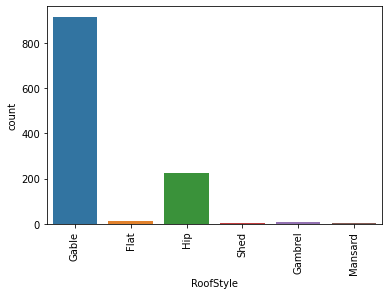

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

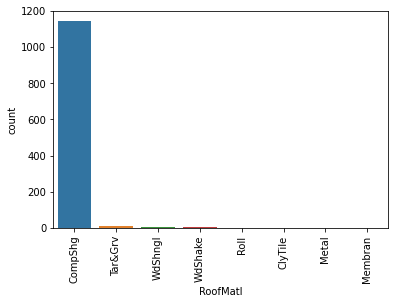

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

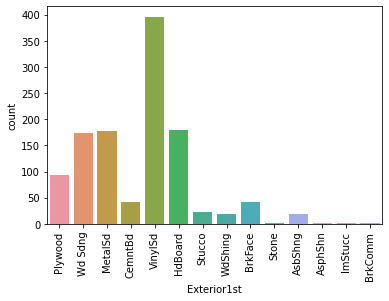

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

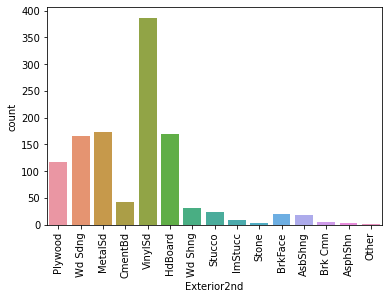

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

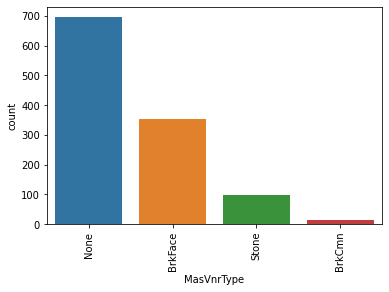

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

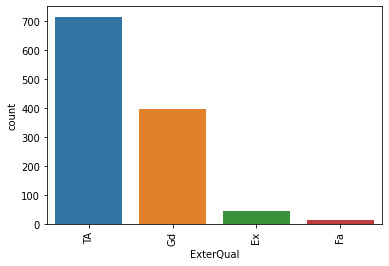

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

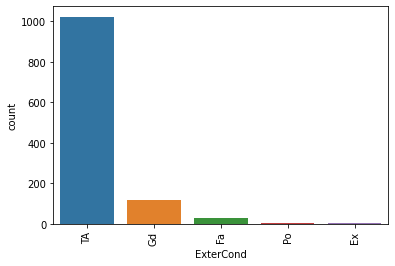

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

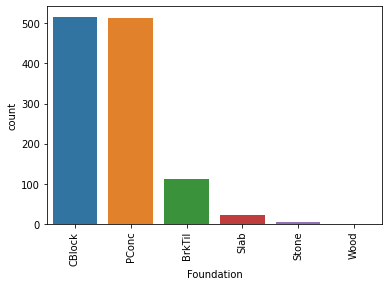

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

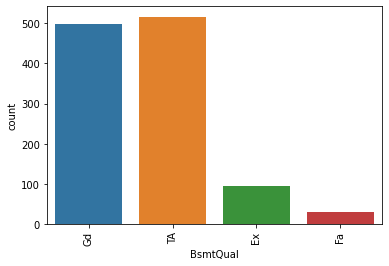

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

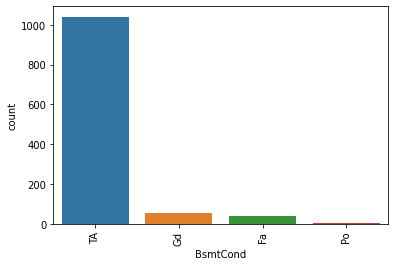

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

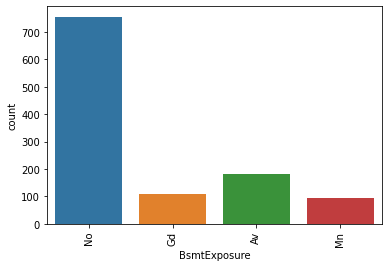

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

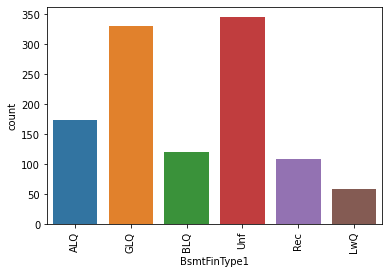

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

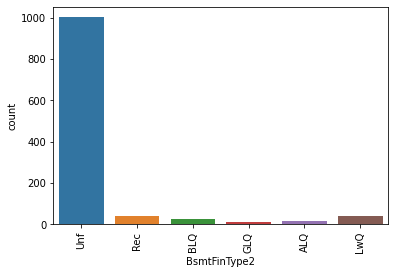

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

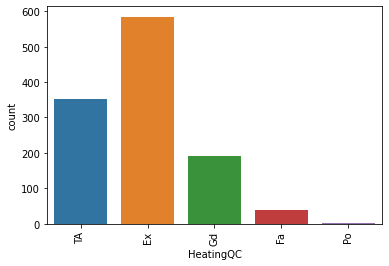

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

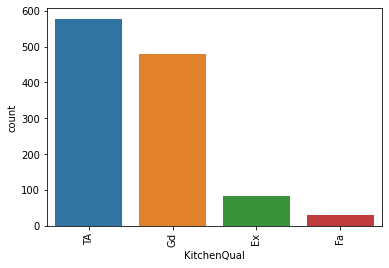

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

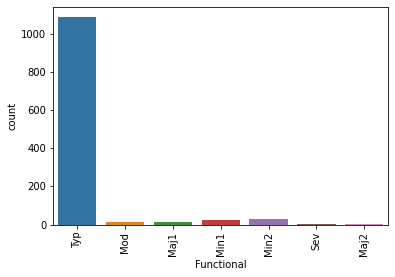

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

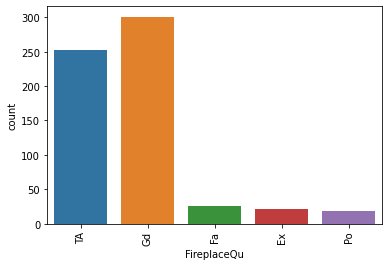

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

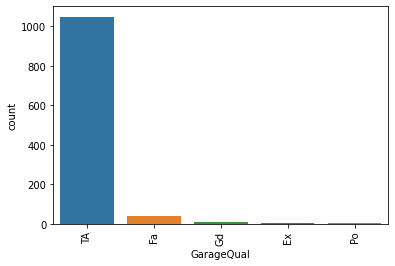

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

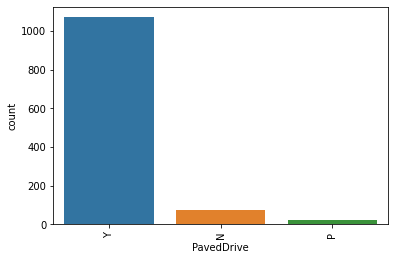

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

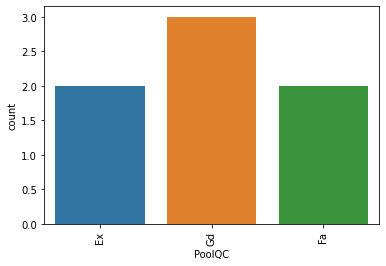

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

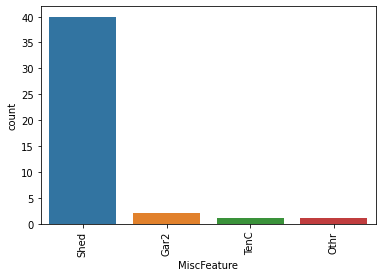

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

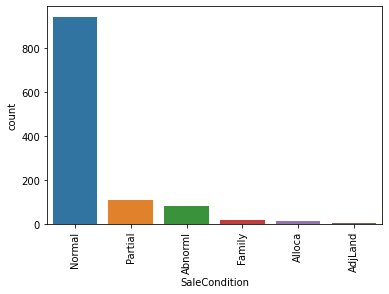

In [20]:
# Check count plot for categorical columns
for i in type_dct_tr.get('object'):
    sns.countplot(x=i, data=df_tr)
    plt.xticks(rotation ='90')
    plt.show()

1. Street feature does not show generalized values.
2. Several features like landslope, condition 1,condition 2, BldgType, RoofMatl, ExterCond, BsmtCond, BsmtFinType2, Heating, CentralAir, Electrical, Functional, GarageQual, GarageCond, PavedDrive, miscFeature, Saletype and SaleCondition are seen with one value repeating than the other categories, which may not allow model to learn precisly.

<IPython.core.display.Javascript object>

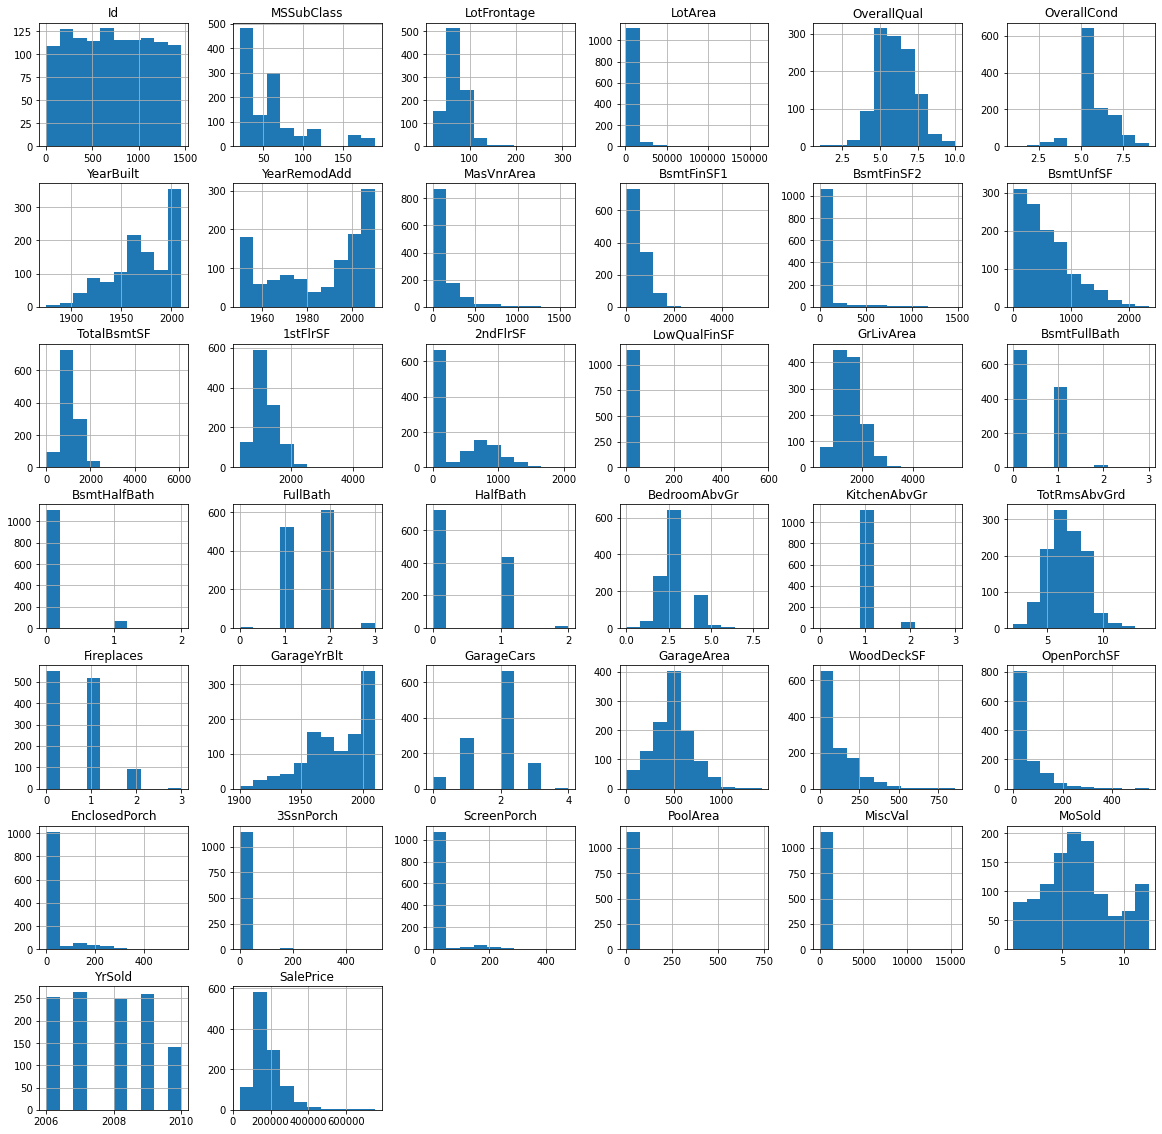

In [21]:
df_tr.hist(figsize = (20,20))
plt.show()

The skewness checked above is confirmed by the plot as features do not show normal distribution

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

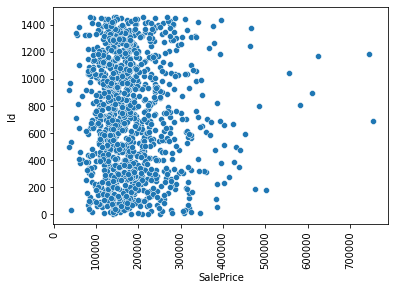

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

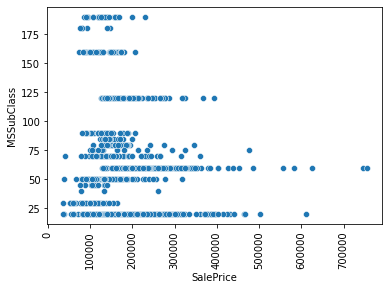

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

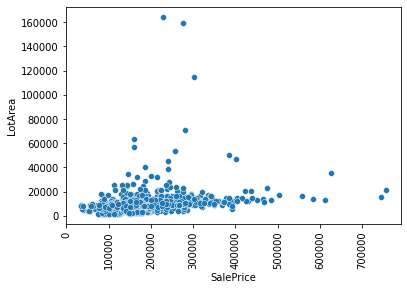

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

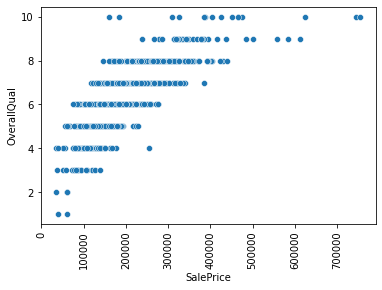

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

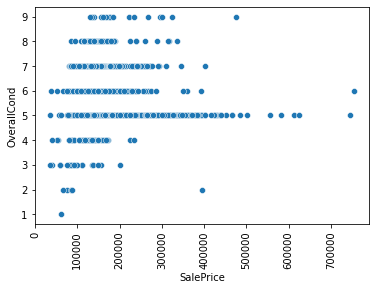

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

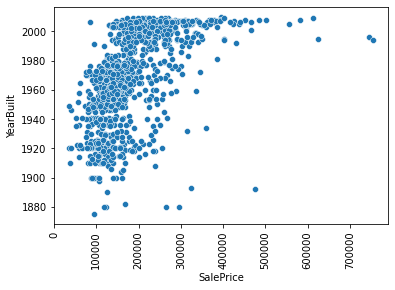

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

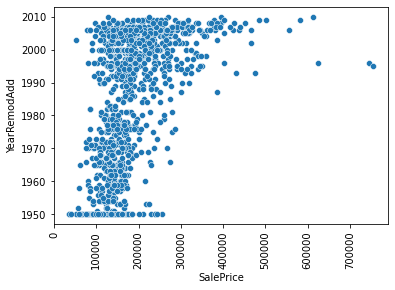

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

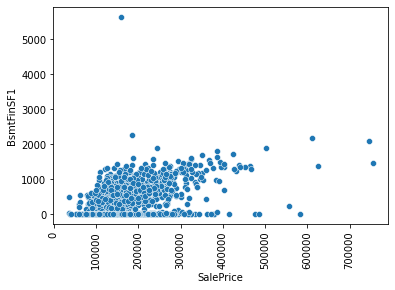

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

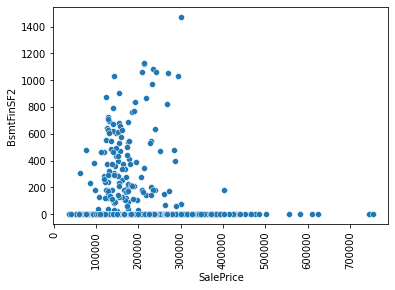

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

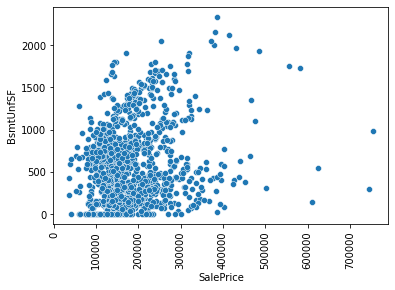

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

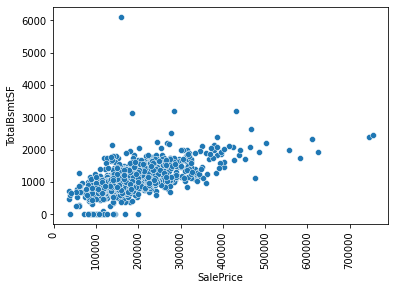

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

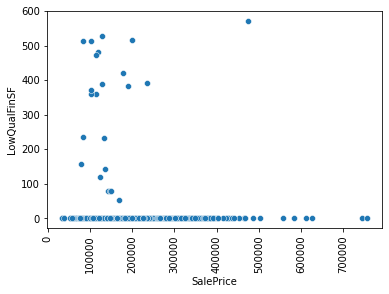

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

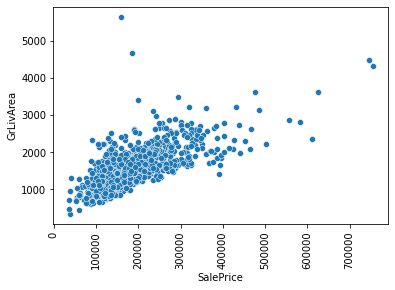

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

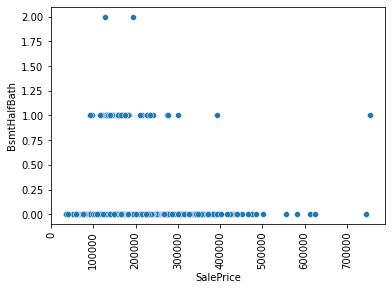

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

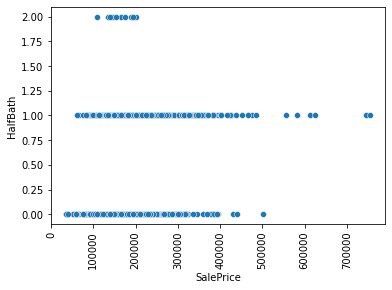

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

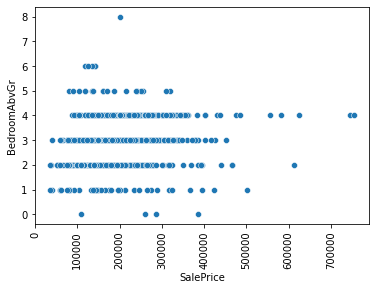

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

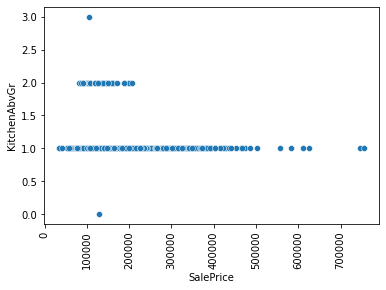

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

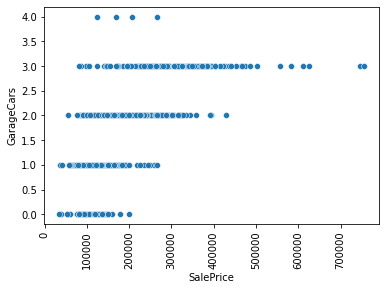

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

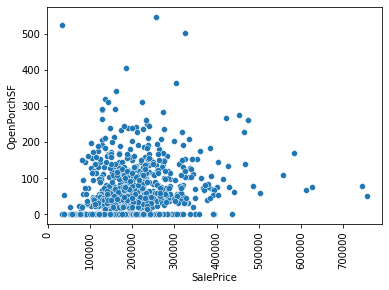

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

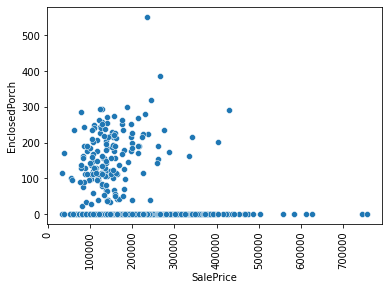

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

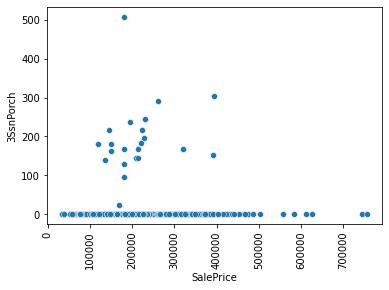

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

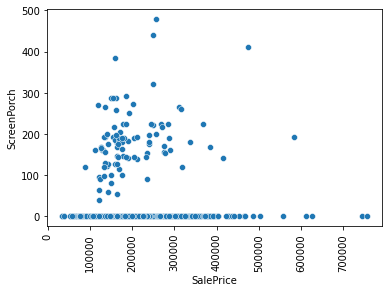

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

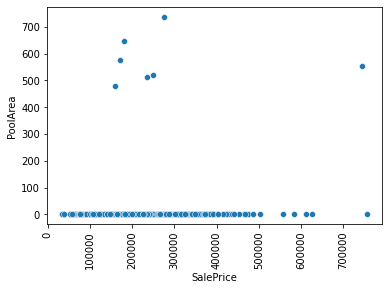

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

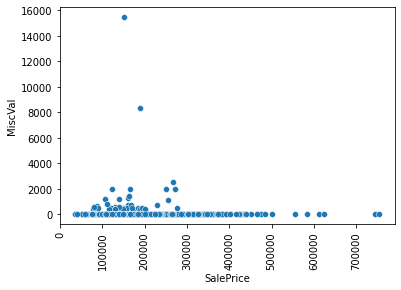

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

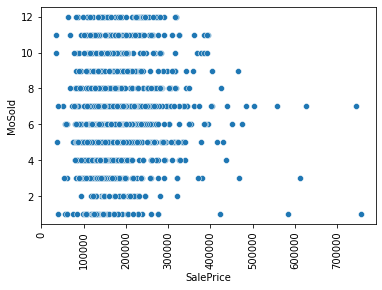

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

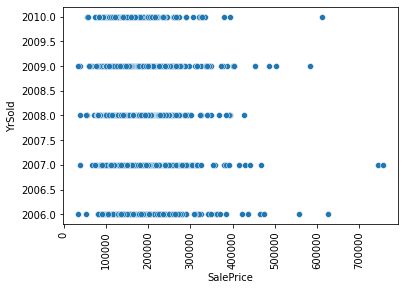

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

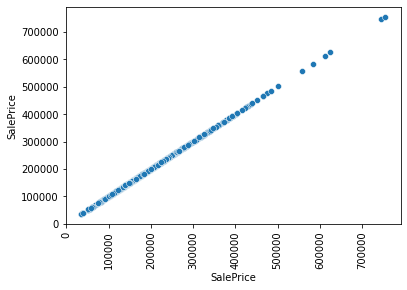

In [22]:
# Scatter Plot/Relation analysis of all numerical variables
for i in type_dct_tr.get('int64'):
    sns.scatterplot(data=df_tr, x='SalePrice', y=i)
    plt.xticks(rotation ='90')
    plt.show()

Some of the features like LotArea, OverallQual, BsmtFinSF1, totalbsmtSF, 1stFlrSF, GrLivArea depict somewhat linear relationship

In [23]:
#Checking coorelation
plt.figure(figsize = (10,5))
df_tr.drop('SalePrice',axis=1).corrwith(df_tr['SalePrice']).plot(kind='bar', cmap ='viridis')
plt.title('Sale Price Correlation')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Features YearRemodAdd, YearBuilt, TotRmsAbvGrd, FullBath, 1stFlrSF, TotalBsmtSF, GarageArea, GarageCars, GrLivArea, OverallQual show good coorelation i.e above +0.5

### Multivariate Analysis

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

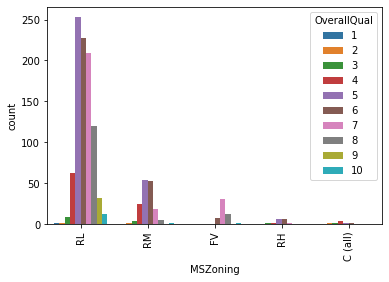

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

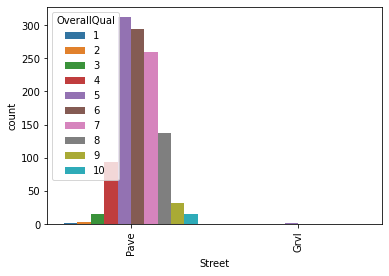

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

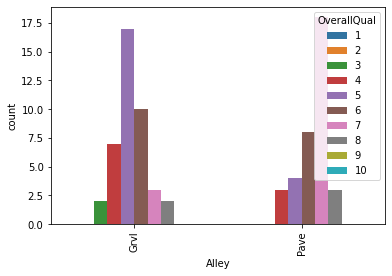

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

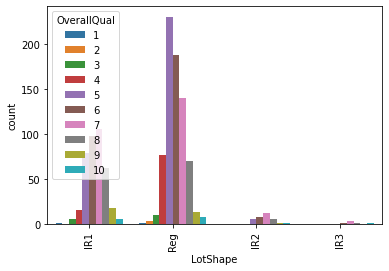

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

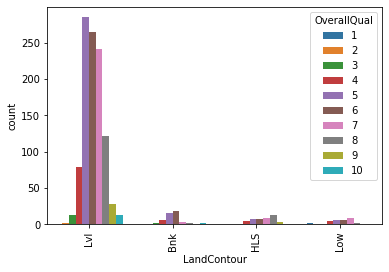

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

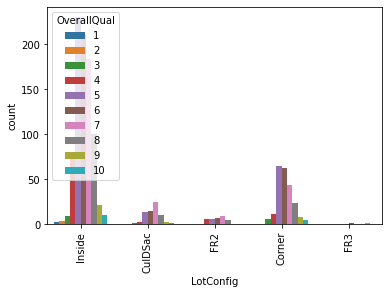

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

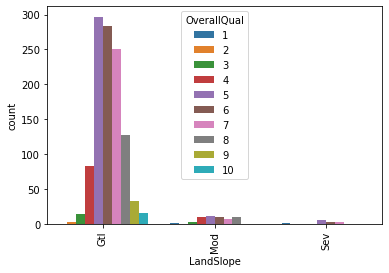

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

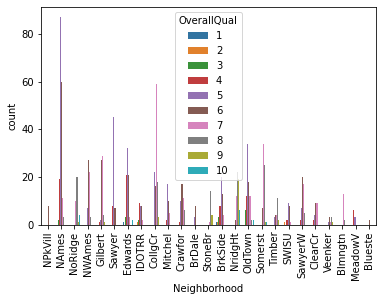

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

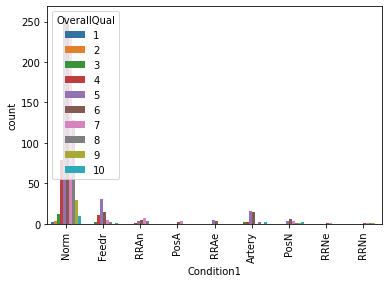

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

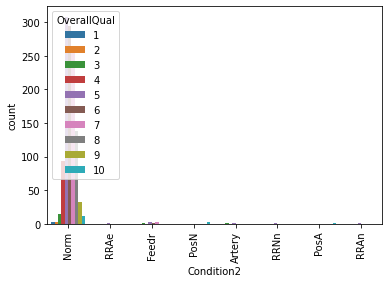

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

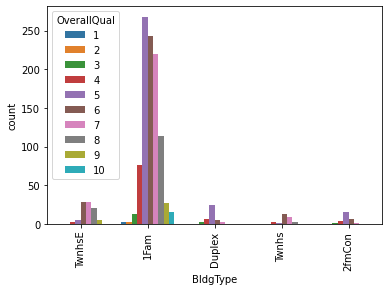

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

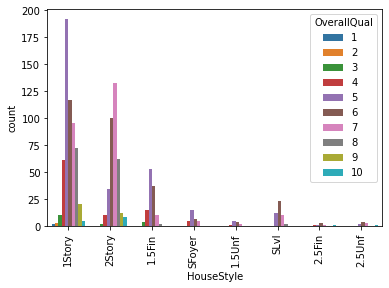

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

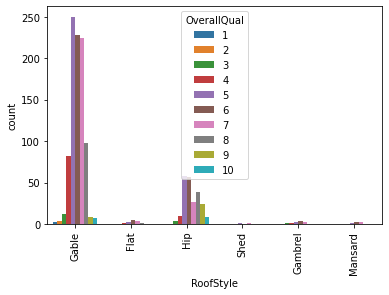

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

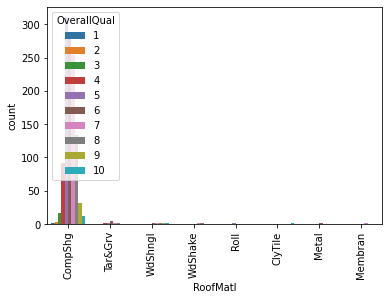

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

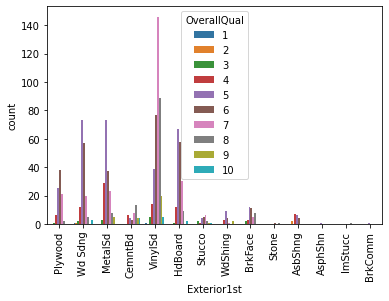

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

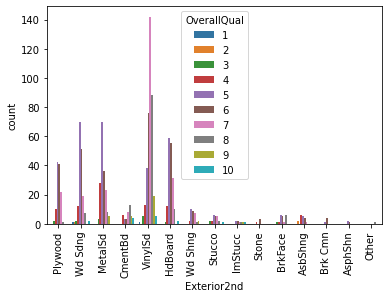

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

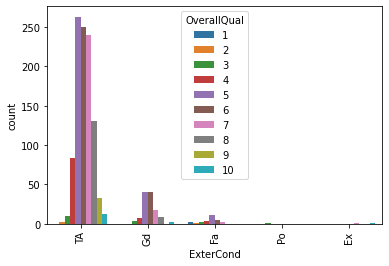

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

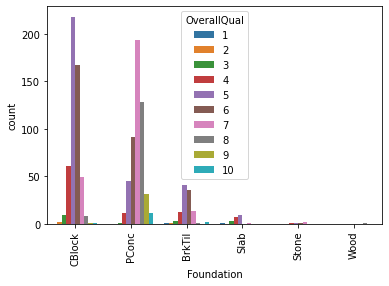

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

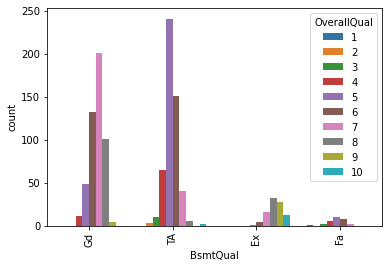

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

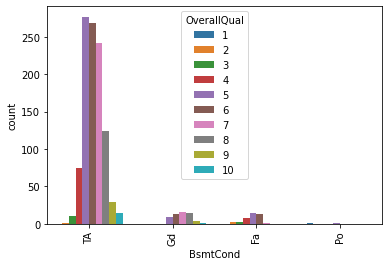

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

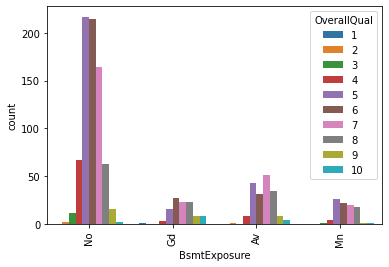

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

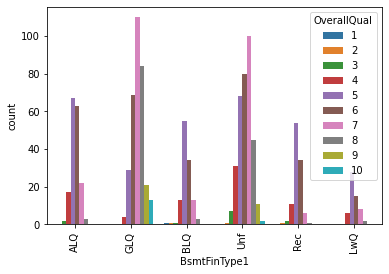

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

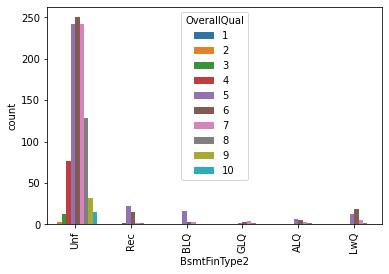

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

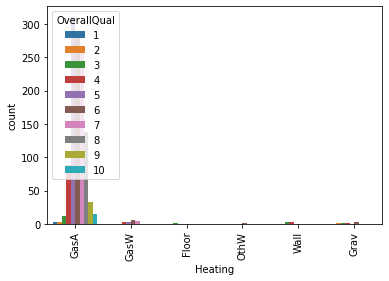

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

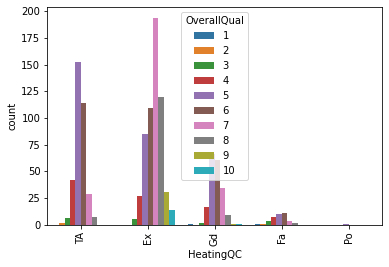

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

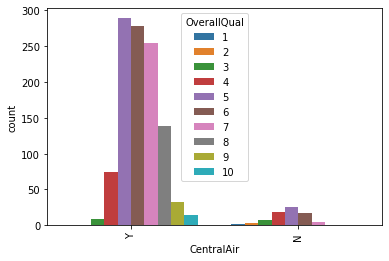

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

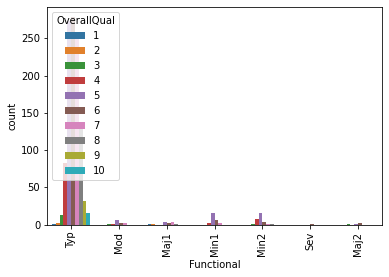

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

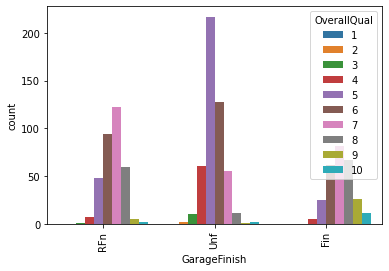

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

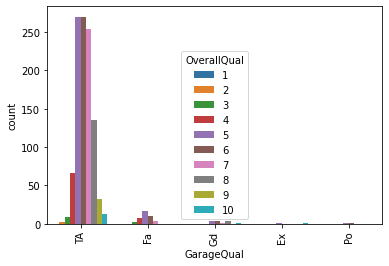

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

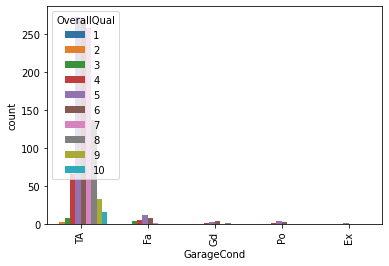

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

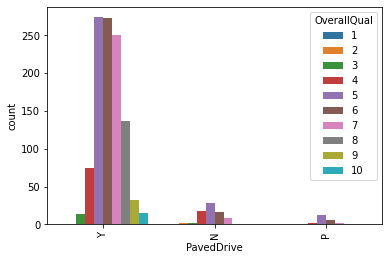

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

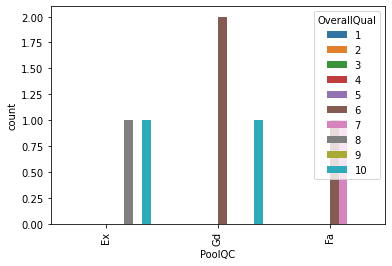

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

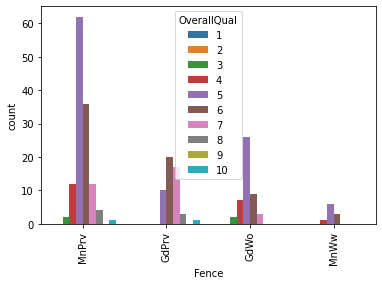

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

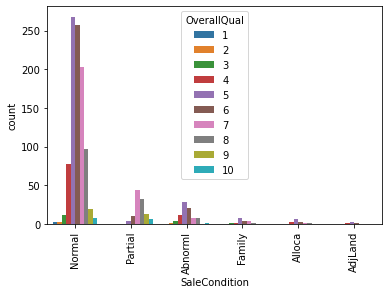

In [24]:
# Check count plot for categorical columns
for i in type_dct_tr.get('object'):
    sns.countplot(x=i, data=df_tr, hue = df_tr['OverallQual'])
    plt.xticks(rotation ='90')
    plt.show()

It can be seen that maximum properties are of average overall quality in all categories though high and low quality are very few.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

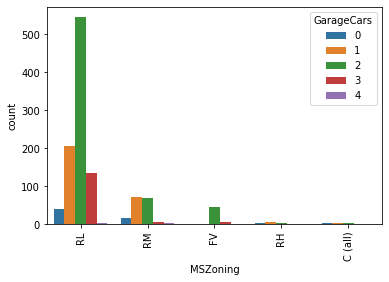

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

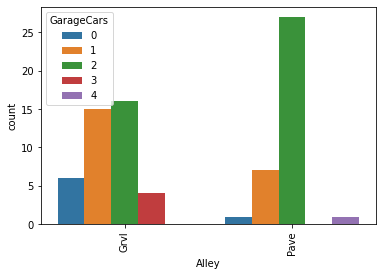

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

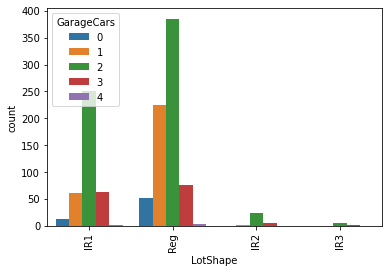

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

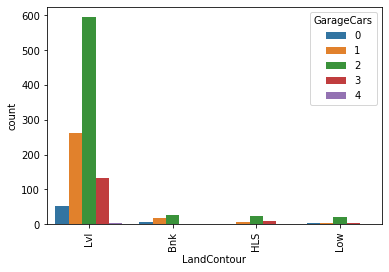

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

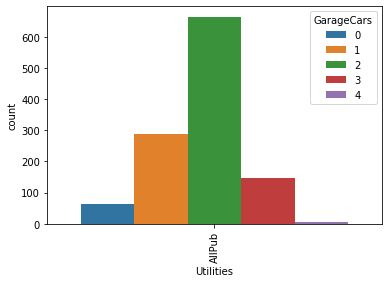

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

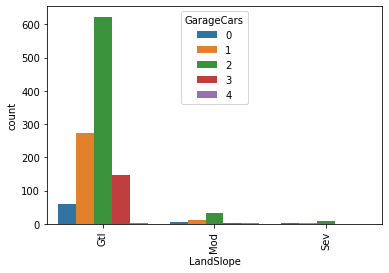

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

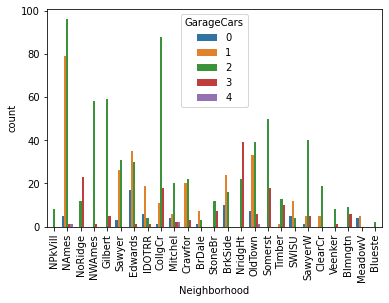

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

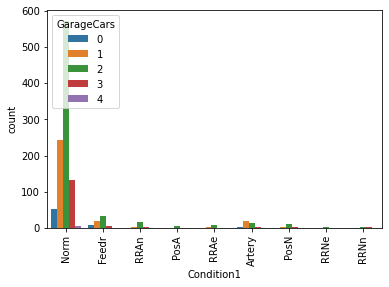

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

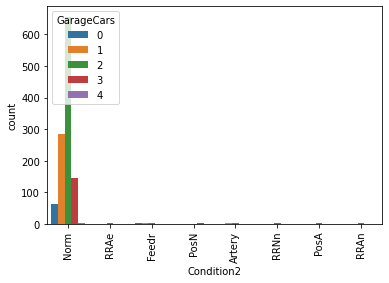

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

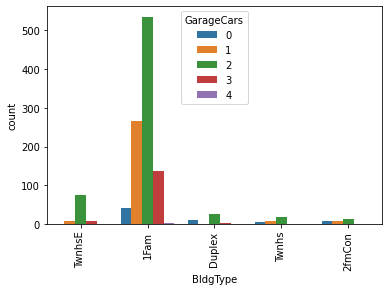

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

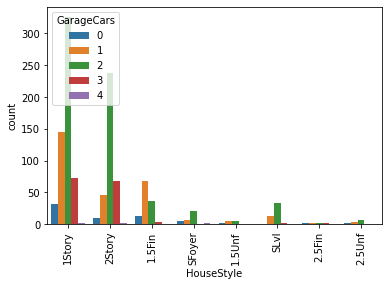

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

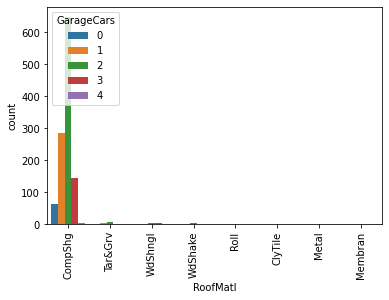

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

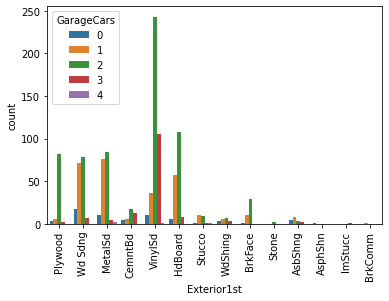

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

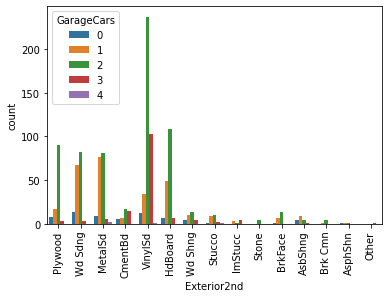

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

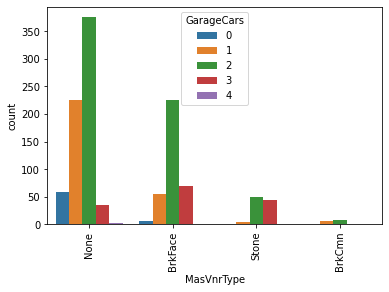

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

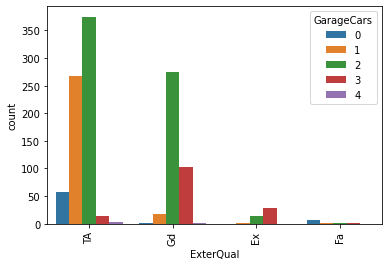

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

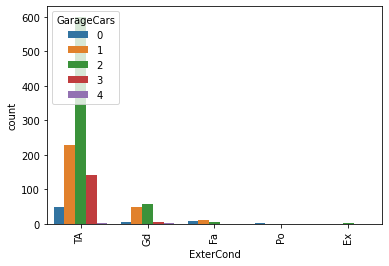

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

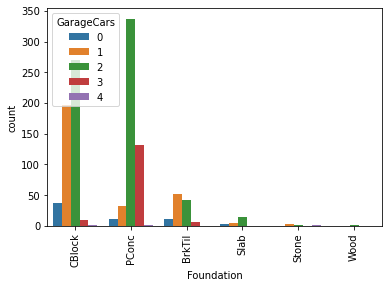

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

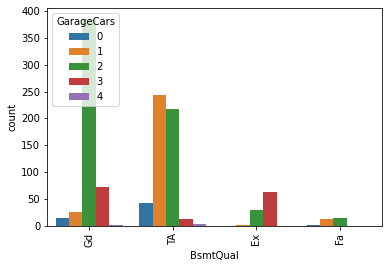

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

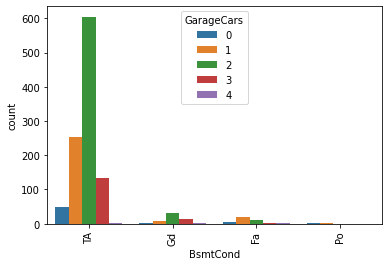

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

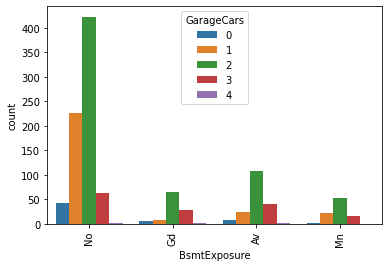

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

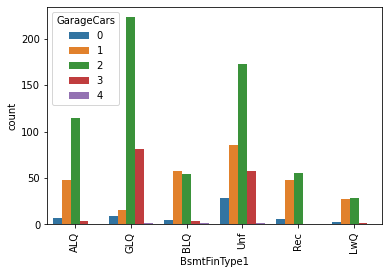

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

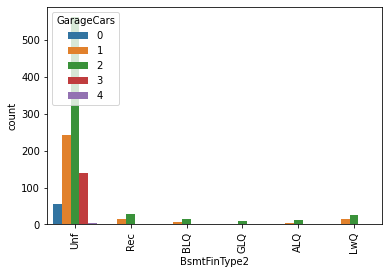

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

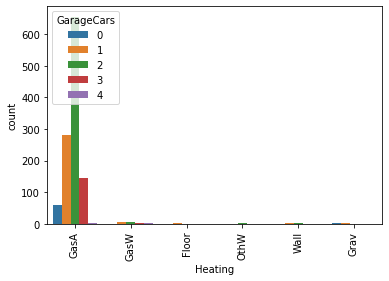

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

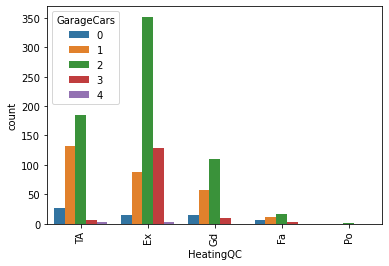

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

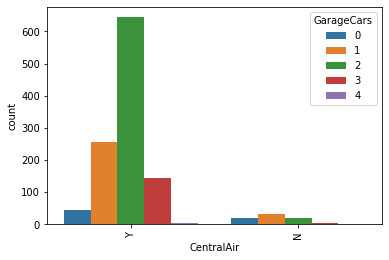

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

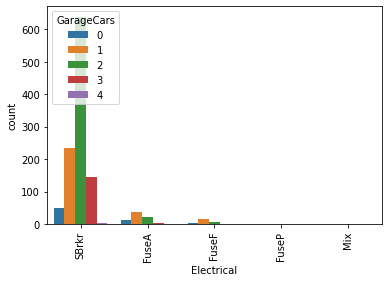

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

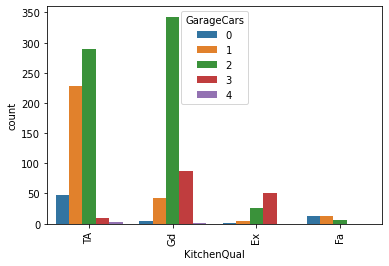

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

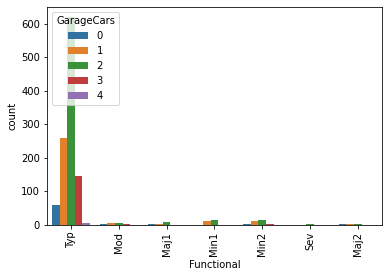

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

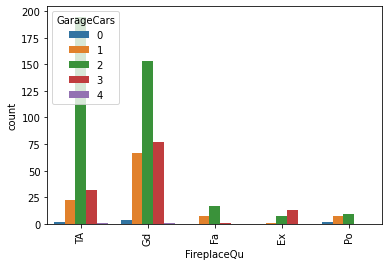

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

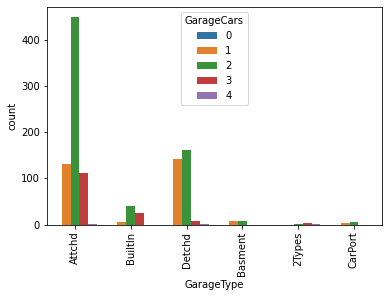

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

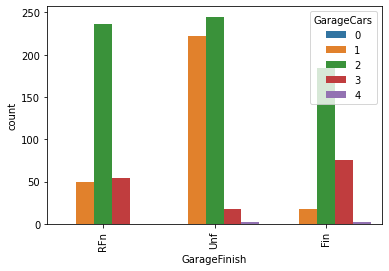

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

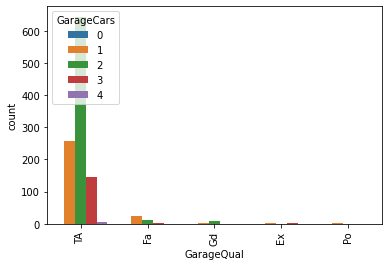

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

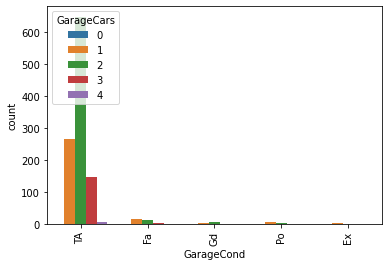

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

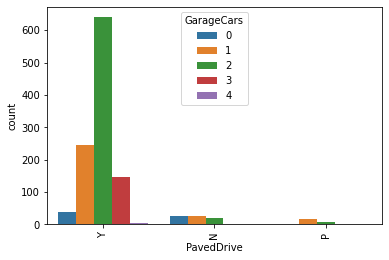

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

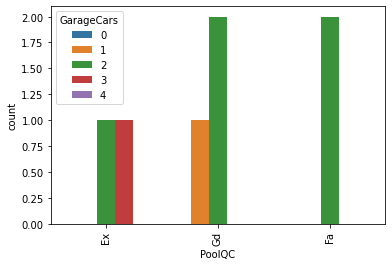

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

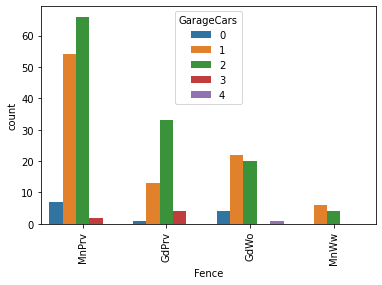

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

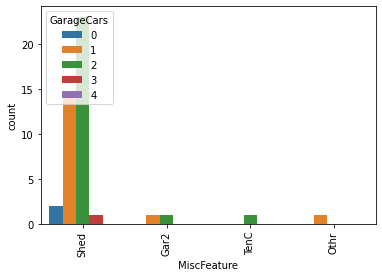

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

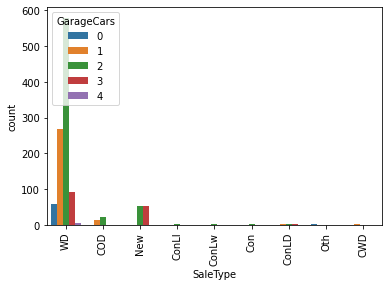

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

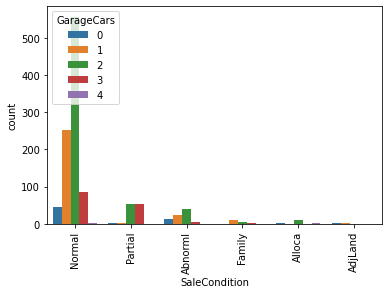

In [25]:
# Check count plot for categorical columns
for i in type_dct_tr.get('object'):
    sns.countplot(x=i, data=df_tr, hue = df_tr['GarageCars'])
    plt.xticks(rotation ='90')
    plt.show()

it can be seen that most properies have garage with 2 cars

# Feature Analysis

In training set :
1. ROWS - 1168
2. DUPLICATES - 0
3. FEATURES - 81
4. CATEGORICAL - 54
5. NUMERICAL - 26
6. TEXT - 1

In test set :
1. ROWS - 292
2. DUPLICATES - 0
3. FEATURES - 80
4. CATEGORICAL - 54
5. NUMERICAL - 25
6. TEXT - 1


Constant/Unique values : Utilities & Id has constants in both training & test sets

Missing Values: LotFrontage - 18.3%, Alley - 93.4%, FireplaceQu - 47.2%, PoolQC - 99.4%, Fence - 79.7%, MiscFeature - 96.2%, BsmtQual - 2.6%, BsmtCond - 2.6%, BsmtExposure - 2.7%, BsmtFinType1 - 2.6%, BsmtFinType2 - 2.7%,GarageType - 5.5%,
GarageYrBlt - 5.5%, GarageFinish 5.5%, GarageQual - 5.5%, GarageCond - 5.5%, 

Skewness more than +/-0.5: MiscVal, PoolArea, LotArea, 3SsnPorch, LowQualFinSF, BsmtFinSF2, KitchenAbvGr, BsmtHalfBath, ScreenPorch, EnclosedPorch, MasVnrArea, LotFrontage, OpenPorchSF, SalePrice, BsmtFinSF1, TotalBsmtSF, 1stFlrSF, WoodDeckSF, GrLivArea, MSSubClass,  BsmtUnfSF, 2ndFlrSF, Fireplaces, HalfBath, TotRmsAbvGrd, BsmtFullBath, OverallCond, YearBuilt, GarageYrBlt


Features with zero values : MasVnrArea - 59.2%, BsmtFinSF1 - 32.1%, BsmtFinSF2 - 88.4%, BsmtUnfSF - 8.3%, TotalBsmtSF - 2.6%, 2ndFlrSF - 56.8%, LowQualFinSF - 98.0%, GarageArea - 5.5%, WoodDeckSF - 51.6%, OpenPorchSF - 45.5%, EnclosedPorch - 85.5%, 3SsnPorch - 98.1%, ScreenPorch 91.9%, PoolArea - 99.4%, MiscVal 96.4%

Data is not normally distributed

## Preprocessing

In [45]:
# 1. Drop features with high unique and missing values:
def preproc(df):
    list_e = ['MSZoning','Street','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
              'Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd',
              'MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
              'BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','FireplaceQu',
              'GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','PoolQC','Fence','MiscFeature','SaleType',
              'SaleCondition']
    
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    for i in list_e:
        df[i] = le.fit_transform(df[i].astype(str))
    
              
    # impute data and rename columns
    from sklearn.impute import KNNImputer
    imputer = KNNImputer(n_neighbors = 5)
    df = pd.DataFrame(np.round(imputer.fit_transform(df)), columns = df.columns)
    return(df)

In [46]:
df_tr2 = preproc(df_tr)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [47]:
# importing required libraries
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.linear_model import TheilSenRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import ARDRegression
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import HuberRegressor
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
import xgboost
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

In [48]:
# Creating independent & dependent variable
x = df_tr2.drop(['SalePrice'], axis = 1)
y = df_tr2['SalePrice']

In [49]:
#Checking shape of variables for the model
print(x.shape)
print(y.shape)

(1168, 80)
(1168,)


In [50]:
# identifying Best Random state
import warnings
warnings.filterwarnings('ignore')
best_r_state = 0
accu = 0
for i in range (30,1000):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.22, random_state = i)
    svc =LinearRegression()
    svc.fit(x_train,y_train)
    predsvc = svc.predict(x_test)
    tempaccu = r2_score(y_test,predsvc)
    if tempaccu > accu:
        accu = tempaccu
        best_r_state = i
    
    
print(f'For accuracy is {accu * 100}% best random state is {best_r_state}')

For accuracy is 89.67959084409158% best random state is 266


In [51]:
# Identifying best algorithm with identified random state
from math import sqrt
import warnings
warnings.filterwarnings('ignore')
list=[LinearRegression(),TheilSenRegressor(), RandomForestRegressor(),AdaBoostRegressor(), 
      xgboost.XGBRegressor(), GradientBoostingRegressor(),ARDRegression(),RANSACRegressor(),HuberRegressor(),
      Lasso(alpha =0.01),Ridge(alpha =0.001),ElasticNet(alpha =0.001)]
for m in list:
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.22, random_state = 266)
    m.fit(x_train,y_train)
    pred = m.predict(x_test)
    cv_score = cross_val_score(m,x,y,cv= 10).mean()
    print(f'For algorithm {m} Accuracy Score is {r2_score(y_test,pred)*100}')
    print(f'For algorithm {m} mean Sqr root Error is {sqrt(mean_squared_error(y_test,pred)*100)}')
    print(f'For algorithm {m} cross validation score is {cv_score*100}')
    print(f'Difference between accuracy score & cv score = {round((r2_score(y_test,pred)*100)-(cv_score*100))}\n')

For algorithm LinearRegression() Accuracy Score is 89.67959084409158
For algorithm LinearRegression() mean Sqr root Error is 216757.664393946
For algorithm LinearRegression() cross validation score is 74.33801644830116
Difference between accuracy score & cv score = 15

For algorithm TheilSenRegressor(max_subpopulation=10000) Accuracy Score is 88.88315603955685
For algorithm TheilSenRegressor(max_subpopulation=10000) mean Sqr root Error is 224965.9344951709
For algorithm TheilSenRegressor(max_subpopulation=10000) cross validation score is 49.236523713309786
Difference between accuracy score & cv score = 40

For algorithm RandomForestRegressor() Accuracy Score is 90.73100686425556
For algorithm RandomForestRegressor() mean Sqr root Error is 205419.79209679243
For algorithm RandomForestRegressor() cross validation score is 84.05425988927084
Difference between accuracy score & cv score = 7

For algorithm AdaBoostRegressor() Accuracy Score is 82.55682777261477
For algorithm AdaBoostRegresso

GradientBoostingRegressor seems to be performing best

In [32]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':range(0,100,10),'learning_rate':[.001,0.01,.1],'max_depth':range(1,10,1),'subsample':[.5,.75,1],'random_state':[1,10,50,100]}
clf = GridSearchCV(GradientBoostingRegressor(),parameters)
clf.fit(x_train,y_train)
clf.best_params_

{'learning_rate': 0.1,
 'max_depth': 7,
 'n_estimators': 30,
 'random_state': 50,
 'subsample': 0.75}

In [77]:
# Training Model
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.22, random_state = 181)
gbr = GradientBoostingRegressor(learning_rate = .1,max_depth=7,n_estimators=30,random_state=50,subsample=0.75)
gbr.fit(x_train,y_train)
pred = gbr.predict(x_test)
cv_score = cross_val_score(gbr,x,y,cv= 10).mean()
print(f'R2 Score is {r2_score(y_test,pred)*100}')
print(f'mean Sqr root Error is {sqrt(mean_squared_error(y_test,pred)*100)}')
print(f'cross validation score is {cv_score*100}')
print(f'Difference between r2 score & cv score = {(r2_score(y_test,pred)*100)-(cv_score*100)}\n')
print('+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')

R2 Score is 92.34229897489226
mean Sqr root Error is 222385.6711992152
cross validation score is 85.2302727223442
Difference between r2 score & cv score = 7.112026252548063

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


In [78]:
# Using Shap for model interpretation - Game theoritical approach
import shap
explainer=shap.Explainer(gbr)
shap_values = explainer(x)

In [81]:
# Single prediction
shap.initjs()
shap.plots.force(shap_values[1])

It can be seen that OverallQual is pushing value towards higher side

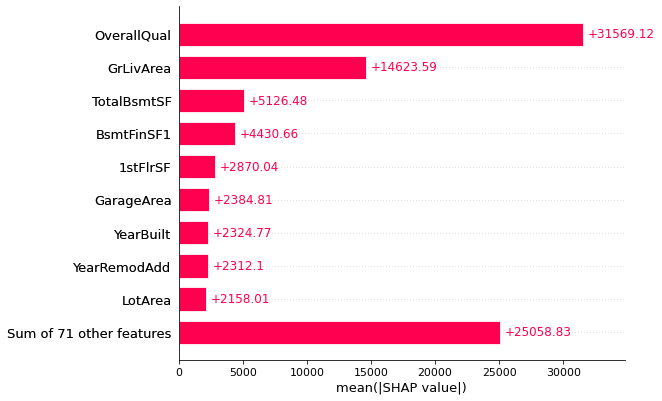

In [80]:
# Summary of features
shap.initjs()
shap.plots.bar(shap_values)

OverallQual is the highest contributing factors.

In [82]:
# Saving the model
import joblib
joblib.dump(gbr,'Housing_Price.obj')
hpp = joblib.load('Housing_Price.obj')
ypred = hpp.predict(x)

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='SalePrice'>

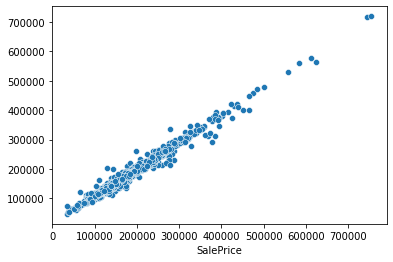

In [83]:
sns.scatterplot(df_tr['SalePrice'],ypred)

In [84]:
# Preprocessing test data
df_te2 = preproc(df_te)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [85]:
# Predicting
ypred = hpp.predict(df_te2)

In [86]:
# Saving Predicted values
ypred = pd.DataFrame(ypred)
ypred.to_csv('housing_values.csv')

<IPython.core.display.Javascript object>

In [95]:
corr = pd.DataFrame(df_tr2.drop(['SalePrice'],axis=1).corrwith(df_tr2['SalePrice']))
corr.columns = ['cor']

<IPython.core.display.Javascript object>

In [97]:
corr.loc[(corr.cor > 0.5) | (corr.cor <-.5)]

cor
OverallQual   0.789185
YearBuilt     0.514408
YearRemodAdd  0.507831
ExterQual    -0.624820
BsmtQual     -0.628798
TotalBsmtSF   0.595042
1stFlrSF      0.587642
GrLivArea     0.707300
FullBath      0.554988
KitchenQual  -0.592468
TotRmsAbvGrd  0.528363
GarageYrBlt   0.500610
GarageFinish -0.550624
GarageCars    0.628329
GarageArea    0.619000

# Conclusion:
 1. Overall Quality is the highest positive impacting feature
 2. External Quality & Basmt Quality are the negatively impacting features.
 3. Though with proper imputation errors can be further reduced